# Prétraitement de donnée

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.float_format = "{:.2f}".format

### 1 - Chargez le fichier ```dataset.csv```

In [3]:
#Pensez à changer dataset.csv par le nom de votre jeu de données
df = pd.read_csv("dataset.csv")
df

,City,Age,Salary,Maried
0,Paris,NaN,72000.00,No
1,New York,27.00,48000.00,Yes
2,Berlin,50.00,54000.00,No
3,Munich,38.00,61000.00,No
4,Madrid,40.00,NaN,Yes
5,Paris,35.00,58000.00,Yes
6,Toulouse,NaN,52000.00,No
7,Berlin,21.00,79000.00,Yes
8,Paris,35.00,NaN,No
9,New York,37.00,67000.00,Yes


### 2 - Remplacez les données manquantes par la moyenne de la caractéristique pour la colonne Age : Cette technique est la meilleure façon à ce jour de traiter les valeurs manquantes. De nombreux statisticiens utilisent cette technique.

In [4]:
#Complétez le code ci-dessous
df.Age = df.Age.fillna(df['Age'].mean())
df

,City,Age,Salary,Maried
0,Paris,35.38,72000.00,No
1,New York,27.00,48000.00,Yes
2,Berlin,50.00,54000.00,No
3,Munich,38.00,61000.00,No
4,Madrid,40.00,NaN,Yes
5,Paris,35.00,58000.00,Yes
6,Toulouse,35.38,52000.00,No
7,Berlin,21.00,79000.00,Yes
8,Paris,35.00,NaN,No
9,New York,37.00,67000.00,Yes


### 3 - Remplacez les données manquantes de la colonne Salary par la mediane de la caractéritique

In [5]:
#Complétez le code ci-dessous
df.Salary = df.Salary.fillna(df['Salary'].mean())
df

,City,Age,Salary,Maried
0,Paris,35.38,72000.00,No
1,New York,27.00,48000.00,Yes
2,Berlin,50.00,54000.00,No
3,Munich,38.00,61000.00,No
4,Madrid,40.00,61375.00,Yes
5,Paris,35.00,58000.00,Yes
6,Toulouse,35.38,52000.00,No
7,Berlin,21.00,79000.00,Yes
8,Paris,35.00,61375.00,No
9,New York,37.00,67000.00,Yes


### 4 - Encodez la colonne City en utilisant les nombres entiers 0, 1 et 2. 

In [6]:
#Complétez le code ci-dessous
df.City=df.City.astype('category').cat.codes
df

,City,Age,Salary,Maried
0,4,35.38,72000.00,No
1,3,27.00,48000.00,Yes
2,0,50.00,54000.00,No
3,2,38.00,61000.00,No
4,1,40.00,61375.00,Yes
5,4,35.00,58000.00,Yes
6,5,35.38,52000.00,No
7,0,21.00,79000.00,Yes
8,4,35.00,61375.00,No
9,3,37.00,67000.00,Yes


### 5 - Faites de même pour la colonne Maried

In [7]:
df.Maried = df.Maried.astype('category').cat.codes
df

,City,Age,Salary,Maried
0,4,35.38,72000.00,0
1,3,27.00,48000.00,1
2,0,50.00,54000.00,0
3,2,38.00,61000.00,0
4,1,40.00,61375.00,1
5,4,35.00,58000.00,1
6,5,35.38,52000.00,0
7,0,21.00,79000.00,1
8,4,35.00,61375.00,0
9,3,37.00,67000.00,1


Dans l'apprentissage automatique, nous divisons les données en deux parties :

L'ensemble d'apprentissage : La partie des données sur laquelle nous mettons en œuvre notre modèle d'apprentissage automatique. Ensemble de test : La partie des données sur laquelle nous évaluons les performances de notre modèle d'apprentissage automatique. La raison pour laquelle nous divisons ces données est de nous assurer que notre modèle d'apprentissage automatique ne surapprend pas la corrélation des données sur lesquelles il est formé. Si nous le laissons trop apprendre sur les données, ses performances risquent d'être médiocres lorsqu'il est testé sur un nouvel ensemble de données avec une corrélation différente.

Par conséquent, lorsque nous construisons un modèle d'apprentissage automatique, l'idée est de le mettre en œuvre sur l'ensemble d'apprentissage et de l'évaluer sur l'ensemble de test. Nous nous attendons à ce que les performances de l'ensemble d'apprentissage et de l'ensemble de test soient différentes et, si c'est le cas, le modèle peut s'adapter à de nouveaux ensembles de données.

### 6 - Divisez l'ensemble de données en ensembles de formation et de test.

In [8]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df.Maried)
#stratify : elle permet de garantir que la distribution de la variable Maried
# reste cohérente entre les deux ensembles de training et de test.

In [9]:
training_set

,City,Age,Salary,Maried
7,0,21.00,79000.00,1
8,4,35.00,61375.00,0
2,0,50.00,54000.00,0
0,4,35.38,72000.00,0
4,1,40.00,61375.00,1
1,3,27.00,48000.00,1
5,4,35.00,58000.00,1
3,2,38.00,61000.00,0


In [10]:
test_set

,City,Age,Salary,Maried
6,5,35.38,52000.00,0
9,3,37.00,67000.00,1


### 7 - Mettez à l'échelle séparément l'ensemble d'entraînement et l'ensemble de test de notre jeu de données.

In [11]:
X_train = training_set.drop('Maried', axis=1)
y_train = training_set['Maried']

X_test = test_set.drop('Maried', axis=1)
y_test = test_set['Maried']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# on apprend les paramètres UNIQUEMENT sur le train
X_train_scaled = scaler.fit_transform(X_train)

# on applique les mêmes paramètres au test
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_train_scaled_df

,City,Age,Salary
7,-1.37,-1.76,1.88
8,1.07,-0.02,-0.05
2,-1.37,1.84,-0.86
0,1.07,0.03,1.11
4,-0.76,0.60,-0.05
1,0.46,-1.01,-1.52
5,1.07,-0.02,-0.42
3,-0.15,0.35,-0.09


In [12]:
# ou avec cette methode qui est mieux pour le test
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

training_set[["Age", "Salary"]] = sc.fit_transform(training_set[["Age", "Salary"]])
training_set

,City,Age,Salary,Maried
7,0,-1.76,1.88,1
8,4,-0.02,-0.05,0
2,0,1.84,-0.86,0
0,4,0.03,1.11,0
4,1,0.60,-0.05,1
1,3,-1.01,-1.52,1
5,4,-0.02,-0.42,1
3,2,0.35,-0.09,0


In [13]:
test_set.iloc[:,1:-1] = test_set.iloc[:,1:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
test_set

,City,Age,Salary,Maried
6,5,-0.71,-0.71,0
9,3,0.71,0.71,1


In [14]:

test_set[["Age", "Salary"]] = sc.transform(test_set[["Age", "Salary"]])
test_set

,City,Age,Salary,Maried
6,5,-4.45,-6.78,0
9,3,-4.28,-6.77,1


### Afficher un graphique

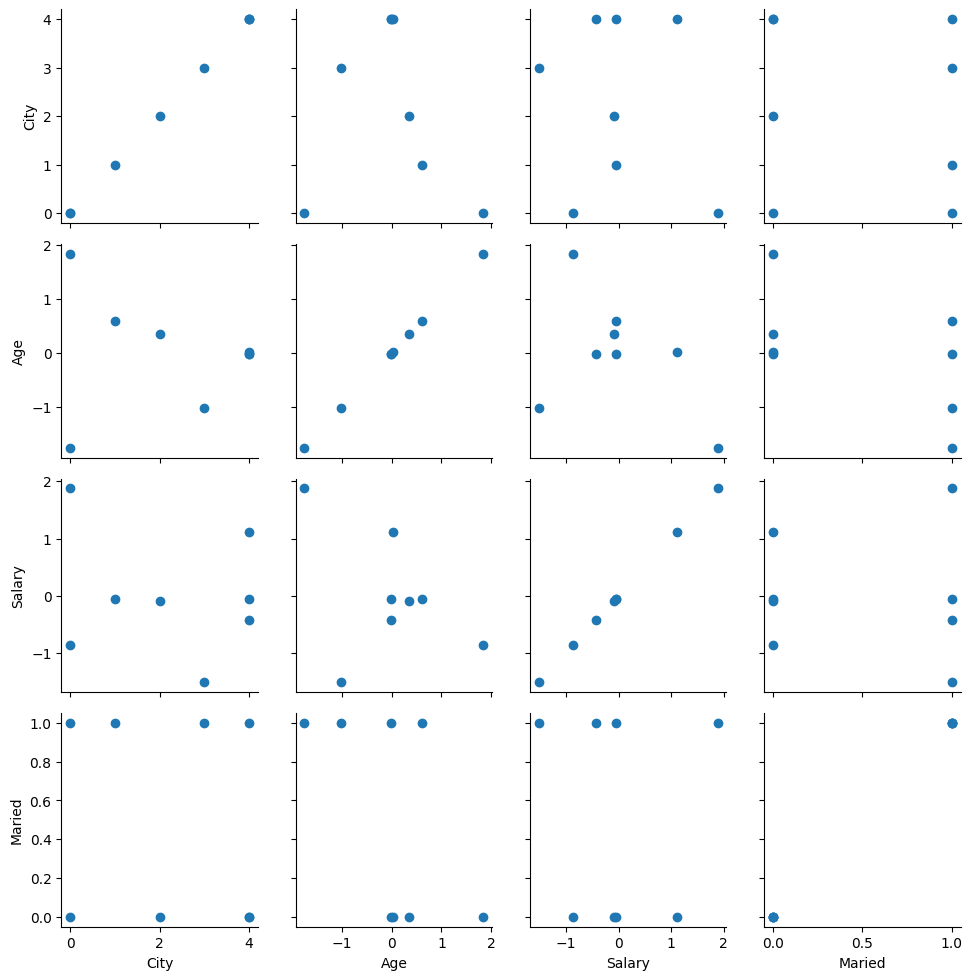

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Créer un PairGrid pour visualiser les relations entre les variables
g = sns.PairGrid(training_set)
g.map(plt.scatter)  # Scatter plots
plt.show()

# Régression linéaire simple

### 1. Nous allons utiliser le jeu de données Tips

In [16]:
Tips = pd.read_csv("tips.csv")

### 2 - Afficher la taille du dataframe

In [17]:
Tips.info()

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    str    
 3   smoker      244 non-null    str    
 4   day         244 non-null    str    
 5   time        244 non-null    str    
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), str(4)
memory usage: 13.5 KB


### 3 - Divisez l'ensemble de données en sous-ensembles de formation et de test en utilisant seulement deux variables : tip et total_bill.

In [18]:
#Train
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(Tips[["total_bill", "tip"]], test_size=0.2, random_state=42)
training_set

,total_bill,tip
228,13.28,2.72
208,24.27,2.03
96,27.28,4.00
167,31.71,4.50
84,15.98,2.03
...,...,...
106,20.49,4.06
14,14.83,3.02
92,5.75,1.00
179,34.63,3.55


In [19]:
#Test
test_set

,total_bill,tip
24,19.82,3.18
6,8.77,2.00
153,24.55,2.00
211,25.89,5.16
198,13.00,2.00
176,17.89,2.00
192,28.44,2.56
124,12.48,2.52
9,14.78,3.23
101,15.38,3.00


### 4 - Vérifier la linéarité entre les caractéristiques "total_bill" et "tip".

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

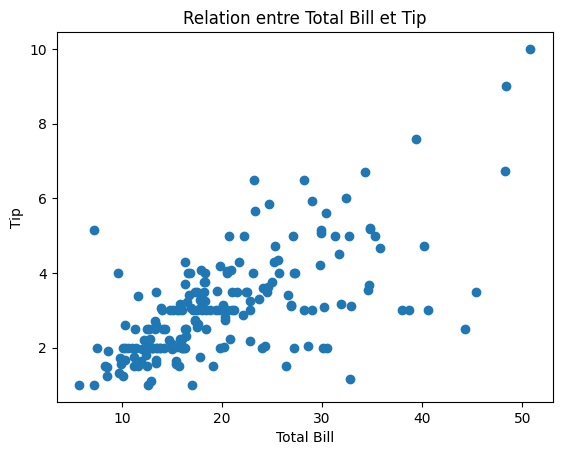

In [21]:
# Vérifier la linéarité avec un scatter plot
plt.scatter(training_set["total_bill"], training_set["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Relation entre Total Bill et Tip")
plt.show()

### 5 - D'après le graphique, nous voyons que la relation est à peu près linéaire. Essayez une transformation de notre variable explicative total_bill en utilisant la fonction logarithmique.

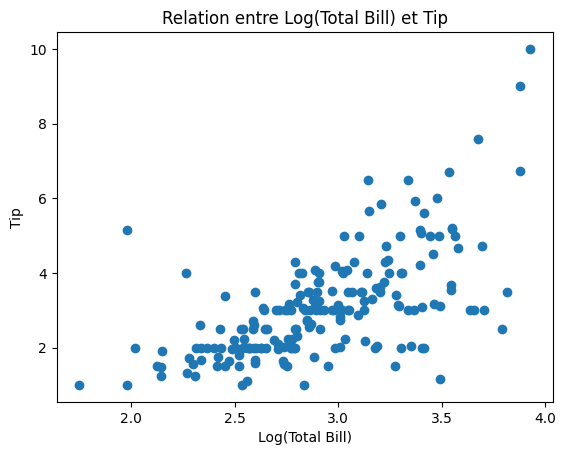

In [22]:
# Appliquer la transformation logarithmique à total_bill
plt.scatter(np.log(training_set["total_bill"]), training_set["tip"])
plt.xlabel("Log(Total Bill)")
plt.ylabel("Tip")
plt.title("Relation entre Log(Total Bill) et Tip")
plt.show()

# Conclusion : La transformation logarithmique peut aider à linéariser la relation
# et à améliorer les prédictions du modèle de régression linéaire

### 6 - Exécutez le modèle de régression linéaire en utilisant la transformation logarithmique.

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.log(training_set["total_bill"]).values.reshape(-1,1), training_set["tip"])

print(f"Coefficient : {reg.coef_}")
print(f"Intercept : {reg.intercept_}")

Coefficient : [2.16543672]
Intercept : -3.2335550531563992


### 7 - Tracez le modèle de régression obtenu.

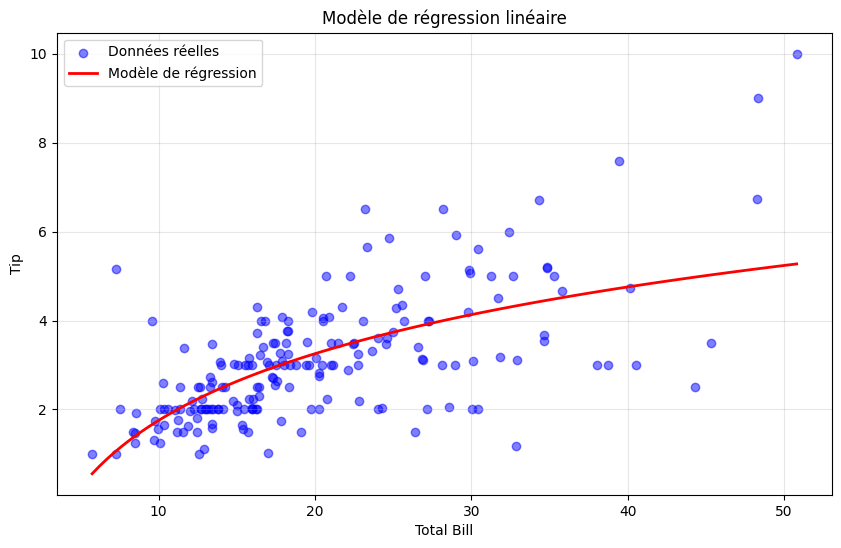

In [24]:
#votre code ici
plt.figure(figsize=(10, 6))

# Données réelles
plt.scatter(training_set["total_bill"], training_set["tip"], color='blue', alpha=0.5, label='Données réelles')

# Droite de régression basée sur le modèle entraîné (avec log transform)
x_vals = np.linspace(training_set["total_bill"].min(), training_set["total_bill"].max(), 100)
y_vals = reg.predict(np.log(x_vals).reshape(-1, 1))
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Modèle de régression')

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Modèle de régression linéaire')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 8 - Faites la prédiction sur le test set et calculer la MSE

In [25]:
from sklearn.metrics import mean_squared_error

# Faire les prédictions sur le test set (avec transformation logarithmique)
y_pred = reg.predict(np.log(test_set["total_bill"]).values.reshape(-1, 1))

# Calculer la MSE
mse = mean_squared_error(test_set["tip"], y_pred)
print(f"MSE sur le test set : {mse:.4f}")

# Afficher quelques prédictions pour comparaison
print("\nComparaison des prédictions :")
comparison = pd.DataFrame({
    'Total_Bill': test_set["total_bill"].values[:5],
    'Tip_Réel': test_set["tip"].values[:5],
    'Tip_Prédit': y_pred[:5]
})
print(comparison)

MSE sur le test set : 0.6073

Comparaison des prédictions :
   Total_Bill  Tip_Réel  Tip_Prédit
0       19.82      3.18        3.23
1        8.77      2.00        1.47
2       24.55      2.00        3.70
3       25.89      5.16        3.81
4       13.00      2.00        2.32


### Linear Regression uning statmodels

In [26]:
import statsmodels.api as sm
#add constant to predictor variables
x = sm.add_constant(np.log(training_set["total_bill"]))
#fit linear regression model
model = sm.OLS(training_set["tip"], x).fit()

In [27]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           2.54e-23
Time:                        15:44:05   Log-Likelihood:                -295.68
No. Observations:                 195   AIC:                             595.4
Df Residuals:                     193   BIC:                             601.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2336      0.561     -5.768      0.0

# Régression linéaire multiple

Le jeu de données Auto MPG

In [28]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.00,4,140.00,86.00,2790.00,15.60,82,1
394,44.00,4,97.00,52.00,2130.00,24.60,82,2
395,32.00,4,135.00,84.00,2295.00,11.60,82,1
396,28.00,4,120.00,79.00,2625.00,18.60,82,1
397,31.00,4,119.00,82.00,2720.00,19.40,82,1


## Nettoyer les données

### 1 - liister les données ayant des valeurs manquants

In [29]:

missing_data = dataset[dataset.isna().any(axis=1)]
missing_data


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.00,4,98.00,NaN,2046.00,19.00,71,1
126,21.00,6,200.00,NaN,2875.00,17.00,74,1
330,40.90,4,85.00,NaN,1835.00,17.30,80,2
336,23.60,4,140.00,NaN,2905.00,14.30,80,1
354,34.50,4,100.00,NaN,2320.00,15.80,81,2
374,23.00,4,151.00,NaN,3035.00,20.50,82,1


### 2 - Supprimez les lignes contenant des NAN

In [30]:

dataset = dataset.dropna()
dataset.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

### 3 - Encodez la colonne Origine en utilisant les nombres entiers 1: USA, 2: Europe et 3: Japan. 

In [31]:

dataset['Origin'] = dataset['Origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.00,8,307.00,130.00,3504.00,12.00,70,USA
1,15.00,8,350.00,165.00,3693.00,11.50,70,USA
2,18.00,8,318.00,150.00,3436.00,11.00,70,USA
3,16.00,8,304.00,150.00,3433.00,12.00,70,USA
4,17.00,8,302.00,140.00,3449.00,10.50,70,USA
...,...,...,...,...,...,...,...,...
393,27.00,4,140.00,86.00,2790.00,15.60,82,USA
394,44.00,4,97.00,52.00,2130.00,24.60,82,Europe
395,32.00,4,135.00,84.00,2295.00,11.60,82,USA
396,28.00,4,120.00,79.00,2625.00,18.60,82,USA


### 4 - Encoder (hot encoding) les valeurs de la colonne Origine avec ```.get_dummies```.

In [32]:

dataset_encoded = pd.get_dummies(dataset, columns=['Origin'])

dataset_encoded.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
0,18.00,8,307.00,130.00,3504.00,12.00,70,False,False,True
1,15.00,8,350.00,165.00,3693.00,11.50,70,False,False,True
2,18.00,8,318.00,150.00,3436.00,11.00,70,False,False,True
3,16.00,8,304.00,150.00,3433.00,12.00,70,False,False,True
4,17.00,8,302.00,140.00,3449.00,10.50,70,False,False,True


### 5 - Diviser les données en ensembles d'apprentissage et de test

In [33]:
from sklearn.model_selection import train_test_split


X = dataset_encoded.drop('MPG', axis=1)
y = dataset_encoded['MPG']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


test_set = X_test.copy()
test_set['MPG'] = y_test


print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (313, 9)
X_test: (79, 9)
y_train: (313,)
y_test: (79,)


In [34]:
#test set
test_set

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA,MPG
79,4,96.00,69.00,2189.00,18.00,72,True,False,False,26.00
276,4,121.00,115.00,2795.00,15.70,78,True,False,False,21.60
248,4,91.00,60.00,1800.00,16.40,78,False,True,False,36.10
56,4,91.00,70.00,1955.00,20.50,71,False,False,True,26.00
393,4,140.00,86.00,2790.00,15.60,82,False,False,True,27.00
...,...,...,...,...,...,...,...,...,...,...
366,6,225.00,85.00,3465.00,16.60,81,False,False,True,17.60
83,4,98.00,80.00,2164.00,15.00,72,False,False,True,28.00
115,8,350.00,145.00,4082.00,13.00,73,False,False,True,15.00
3,8,304.00,150.00,3433.00,12.00,70,False,False,True,16.00


### 6 - Examinez la distribution conjointe de quelques paires de colonnes ('MPG', 'Cylinders', 'Displacement', 'Weight')  de l'ensemble d'apprentissage.

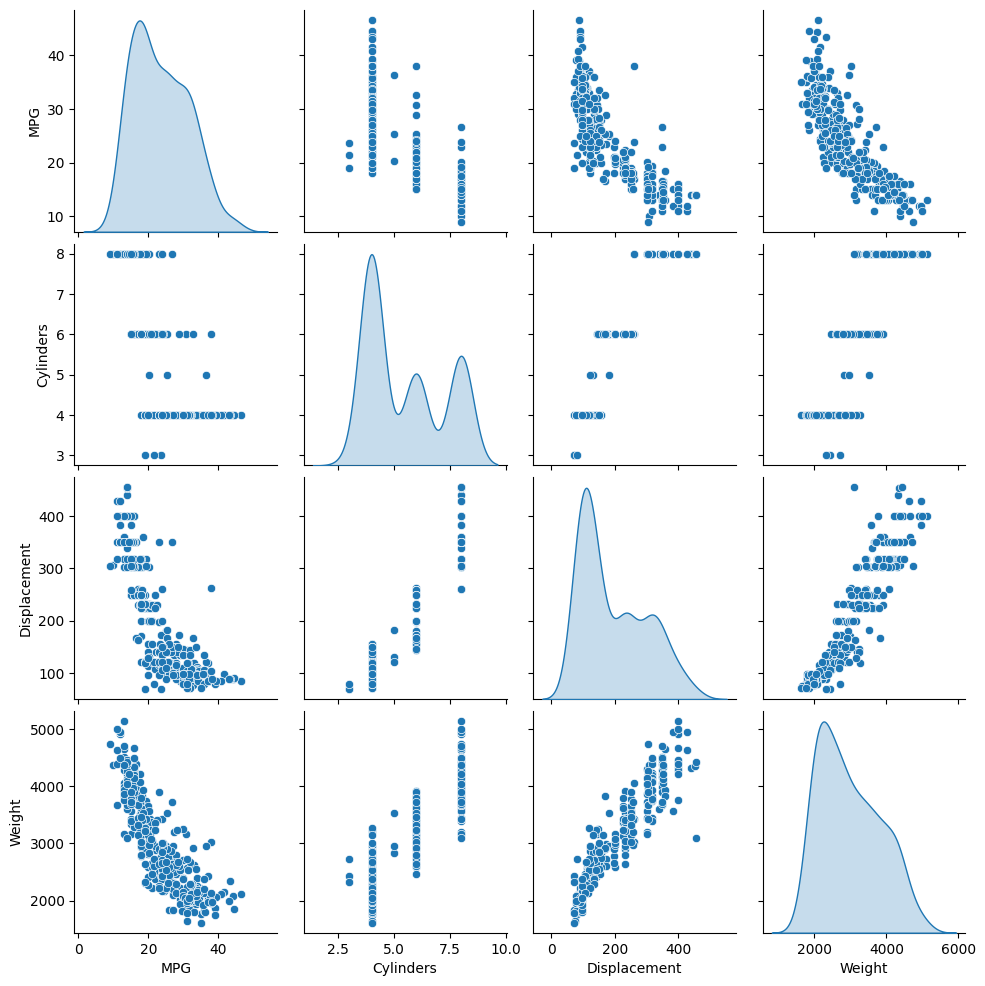

In [35]:
training_set = X_train.copy()
training_set['MPG'] = y_train


g = sns.pairplot(
    training_set[["MPG", "Cylinders", "Displacement", "Weight"]],
    kind='scatter',     
    diag_kind='kde'     
)

plt.show()

### 7 - Afficher les statistiques globales.

In [36]:
dataset_encoded.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


 ### Dans le tableau des statistiques, il est facile de voir à quel point les plages de chaque fonctionnalité sont différentes :

In [37]:
training_set.describe().T[["mean","std"]]

,mean,std
Cylinders,5.48,1.70
Displacement,195.52,103.77
Horsepower,104.59,38.28
Weight,2986.12,841.13
Acceleration,15.54,2.82
Model Year,76.21,3.63
MPG,23.60,7.96


### 8 - Normaliser les données 

In [38]:
from sklearn.preprocessing import StandardScaler
# Copy X_train and add target
training_set = X_train.copy()
training_set['MPG'] = y_train

# Make sure Origin columns are int
origin_cols = ['Origin_Europe', 'Origin_Japan', 'Origin_USA']
training_set[origin_cols] = training_set[origin_cols].astype(int)

# Numeric columns to scale
num_cols = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']

scaler = StandardScaler()
training_set[num_cols] = scaler.fit_transform(training_set[num_cols])

# Split into features and target
X_train_scaled = training_set.drop(columns='MPG').values   # All features
y_train_aligned = training_set['MPG'].values               # Target

print(X_train_scaled.shape)  # Should be (313, n_features)
print(y_train_aligned.shape) # Should be (313,)

(313, 9)
(313,)


In [39]:
training_set

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA,MPG
260,0.30,0.28,0.14,0.75,1.12,0.49,0,0,1,18.60
184,-0.87,-0.54,-0.33,-0.49,-0.23,-0.06,0,0,1,25.00
174,0.30,-0.24,-0.20,-0.00,-0.37,-0.33,0,0,1,18.00
64,1.48,1.18,1.19,1.37,-0.73,-1.16,0,0,1,15.00
344,-0.87,-1.06,-1.06,-1.32,0.30,1.32,0,0,1,39.00
...,...,...,...,...,...,...,...,...,...,...
72,1.48,1.05,1.19,1.08,-1.08,-1.16,0,0,1,15.00
107,0.30,0.35,-0.12,-0.23,-0.19,-0.89,0,0,1,18.00
272,-0.87,-0.43,-0.51,-0.16,0.73,0.49,0,0,1,23.80
352,-0.87,-0.94,-1.04,-0.72,1.83,1.32,0,0,1,29.90


### 9 - Afficher la matrice de corrélation

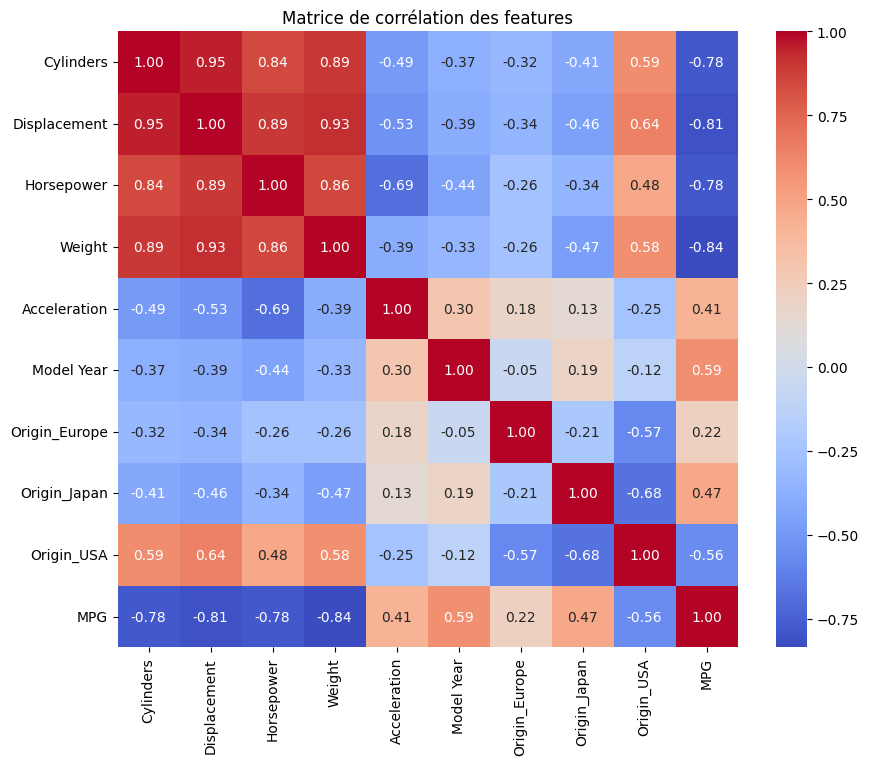

In [40]:

corr_matrix = training_set.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des features")
plt.show()

### 11 - Checker si on peut appliquer la régression linéaire
regarder le support de cours 3

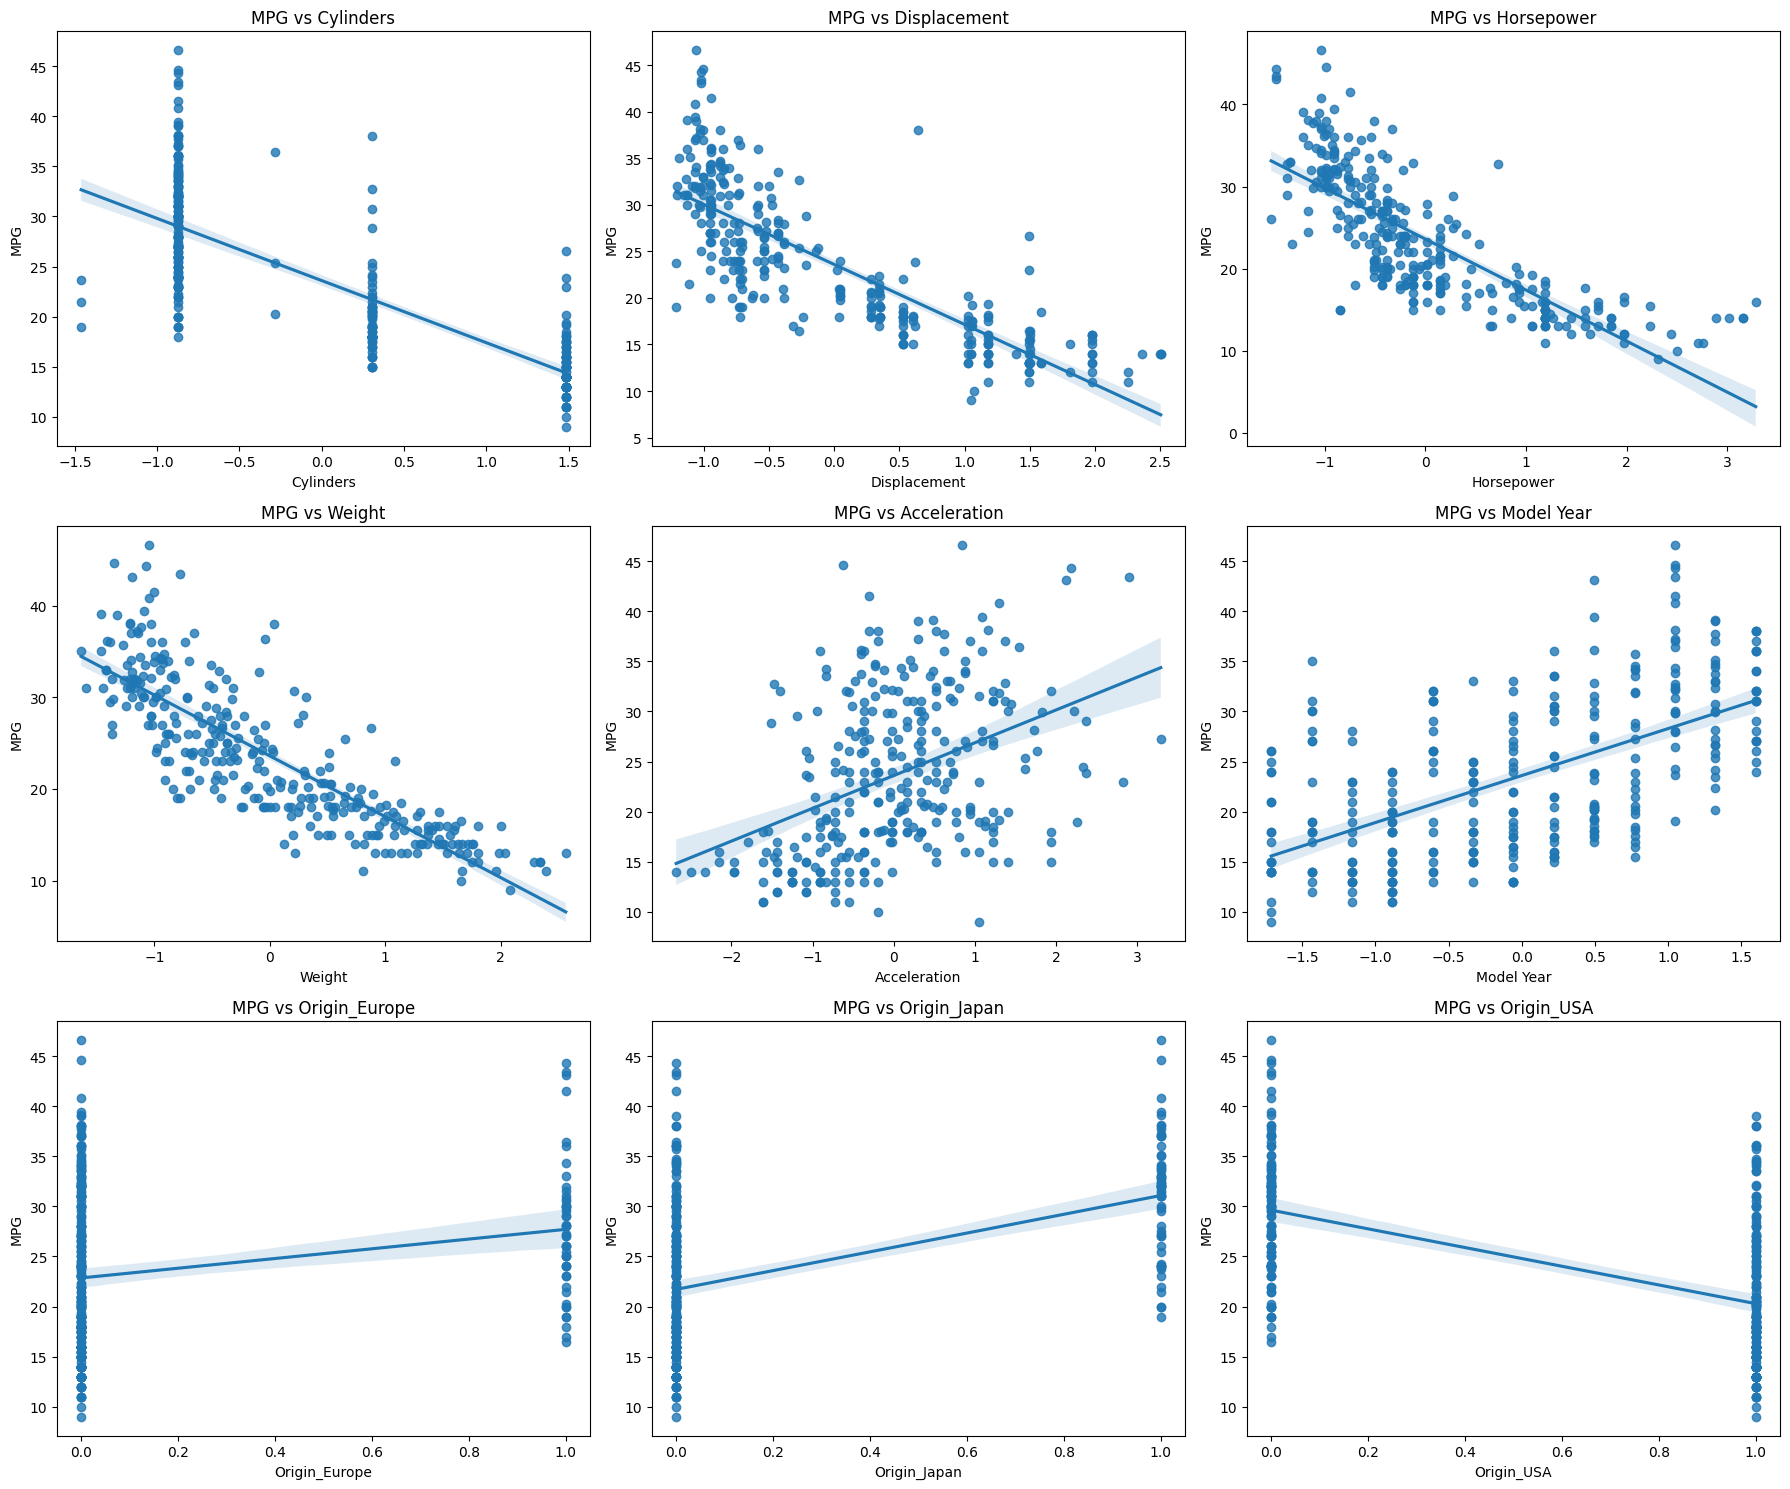

In [41]:
import math

features = training_set.drop("MPG", axis=1).columns
n = len(features)
cols = 3  
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5*rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.regplot(x=training_set[col], y=training_set["MPG"], ax=axes[i])
    axes[i].set_title(f"MPG vs {col}")


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [42]:
#votre code ici

In [43]:
#votre code ici

C:\Users\basti\AppData\Local\Temp\ipykernel_27096\3043935754.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm, ax=axes[i,j])
C:\Users\basti\AppData\Local\Temp\ipykernel_27096\3043935754.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm, 

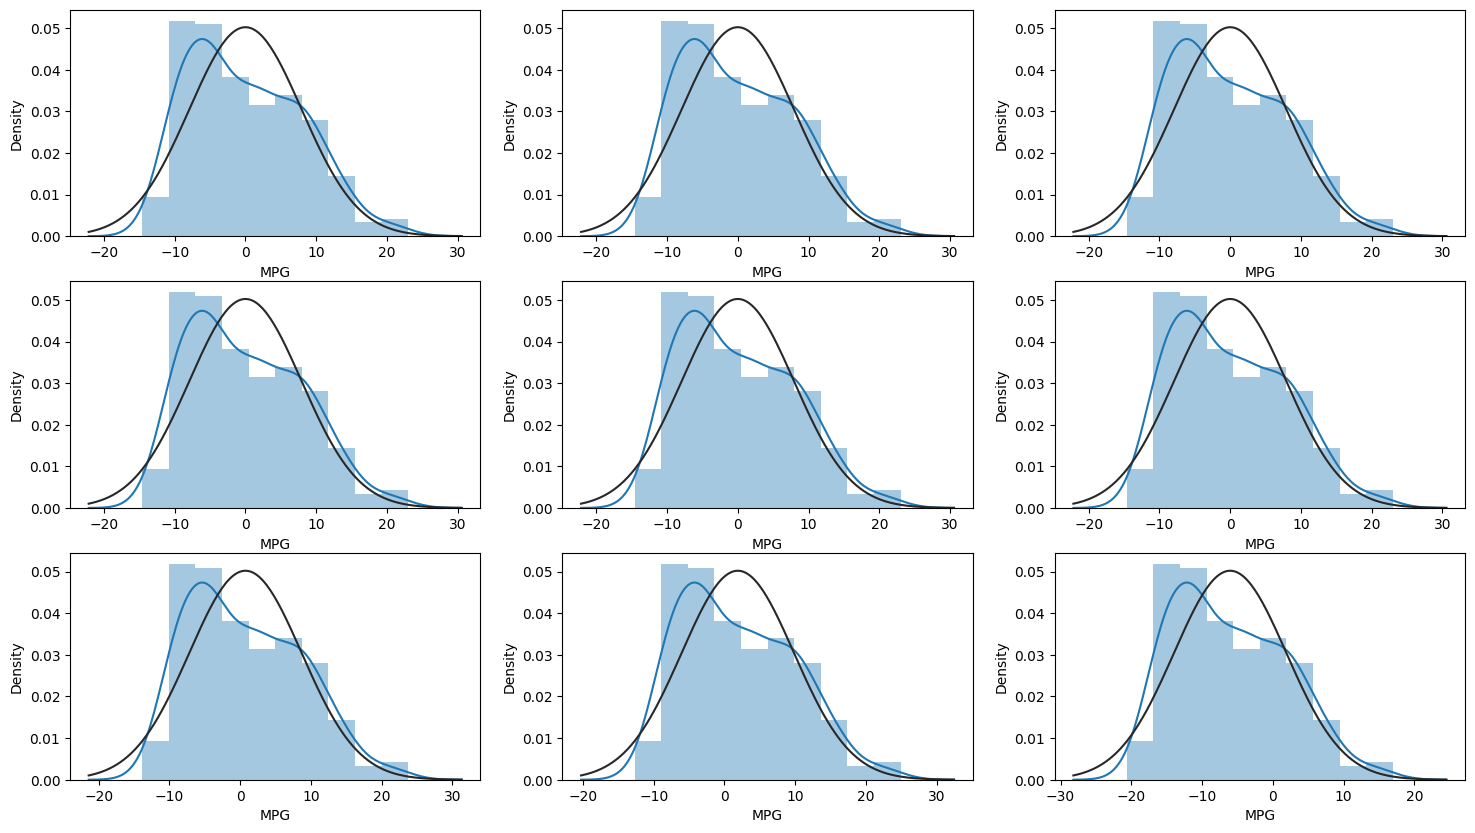

In [44]:
#check for normality

from scipy import stats
import matplotlib.pyplot as plt

fig , axes = plt.subplots(3, 3, figsize=(18,10))
i = 0
j = 0
for col in training_set.drop("MPG", axis=1):
    residuals = training_set["MPG"] - stats.linregress(training_set[col], training_set["MPG"])[1]
    sns.distplot(residuals, fit=stats.norm, ax=axes[i,j])
    
    #axes[i,j].set_ylabel("residuals")
    
    j+=1
    if j == 3 :
        i+=1
        j=0

### 12 - Entraînez le modèle

In [45]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)



model.fit(X_train_scaled, y_train)





X_train_scaled shape: (313, 9)
y_train shape: (313,)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [46]:
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)

Coefficients : [-0.58079485  1.98975015 -0.82638498 -5.39369235  0.11871844  2.88917838
  0.84834323  1.17881301 -2.02715623]
Intercept : 24.540255159913478


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train_features = training_set.drop("MPG", axis=1)
y_train_target = training_set["MPG"]

model.fit(X_train_features, y_train_target)
y_pred_train = model.predict(X_train_features)

print("MAE:", mean_absolute_error(training_set["MPG"], y_pred_train))
print("MSE:", mean_squared_error(training_set["MPG"], y_pred_train))

MAE: 2.5445826417298005
MSE: 10.809834360243096


### 11 - Afficher l'erreur

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

num_cols = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
cat_cols = ['Origin_Europe', 'Origin_Japan', 'Origin_USA']
feature_cols = num_cols + cat_cols


scaler = StandardScaler()
X_train_scaled = X_train[feature_cols].copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test_scaled = X_test[feature_cols].copy()
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)


print("=== Erreurs sur le jeu d'entraînement ===")
print(f"MAE : {mae_train:.2f}")
print(f"MSE : {mse_train:.2f}")
print(f"RMSE : {rmse_train:.2f}")
print(f"R² : {r2_train:.2f}\n")

print("=== Erreurs sur le jeu de test ===")
print(f"MAE : {mae_test:.2f}")
print(f"MSE : {mse_test:.2f}")
print(f"RMSE : {rmse_test:.2f}")
print(f"R² : {r2_test:.2f}")


=== Erreurs sur le jeu d'entraînement ===
MAE : 2.54
MSE : 10.81
RMSE : 3.29
R² : 0.83

=== Erreurs sur le jeu de test ===
MAE : 2.46
MSE : 10.60
RMSE : 3.26
R² : 0.79
